In [120]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

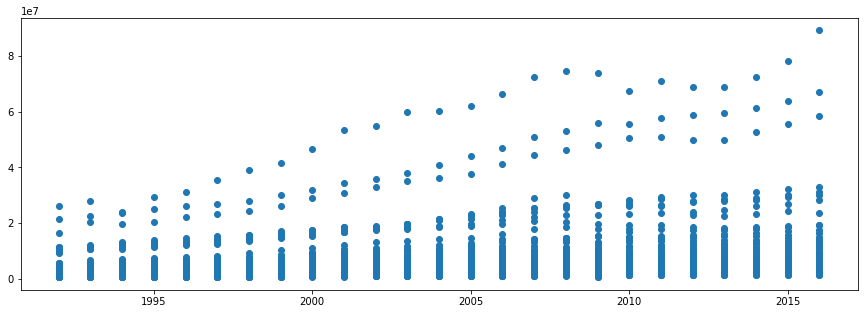

In [124]:
plt.figure(figsize = (15,5))

plt.subplot(1,1,1)
x = df['YEAR']
y = df["TOTAL_REVENUE"]
plt.scatter(x,y)
plt.show()

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [60]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [22]:
for column_name in df.columns:
    print("Unique counts in column {} are: {}".format(column_name, df[column_name].nunique()))

Unique counts in column PRIMARY_KEY are: 1487
Unique counts in column STATE are: 80
Unique counts in column YEAR are: 26
Unique counts in column ENROLL are: 1224
Unique counts in column TOTAL_REVENUE are: 1274
Unique counts in column FEDERAL_REVENUE are: 1275
Unique counts in column STATE_REVENUE are: 1251
Unique counts in column LOCAL_REVENUE are: 1275
Unique counts in column TOTAL_EXPENDITURE are: 1275
Unique counts in column INSTRUCTION_EXPENDITURE are: 1275
Unique counts in column SUPPORT_SERVICES_EXPENDITURE are: 1275
Unique counts in column OTHER_EXPENDITURE are: 1222
Unique counts in column CAPITAL_OUTLAY_EXPENDITURE are: 1275
Unique counts in column GRADES_PK_G are: 1261
Unique counts in column GRADES_KG_G are: 1348
Unique counts in column GRADES_4_G are: 1340
Unique counts in column GRADES_8_G are: 1347
Unique counts in column GRADES_12_G are: 1342
Unique counts in column GRADES_1_8_G are: 1360
Unique counts in column GRADES_9_12_G are: 1358
Unique counts in column GRADES_ALL_

In [23]:
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

QUESTION 2: Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

ANSWER: The most accruate way to fill in data caps would be to sort that data by 'STATE' and then by 'YEAR' first. This lets us know, for instatnce, that we have no financial data (ENROLL, REVENUE columns, EXPENDITURE columns) for American Samoa and the Bureau of Indian Affairs, Commonwealth of Marianas, Guam, etc. for example, so there is no way to interpolate in these cases.

For states where we do have data for most years, the best way to fill in the blanks seems to be the median value for the column. This approach will work for the REVENUE and EXPENSE columns as well as for the GRADES columns (which list number of students in each grade group).



In [76]:
def fill_by_state (df, column):
    df[column] = df.groupby('STATE')[column].apply(lambda x: x.fillna(x.mean()))

fill_by_state(df, 'ENROLL')
fill_by_state(df, 'TOTAL_REVENUE')   
fill_by_state(df, 'FEDERAL_REVENUE')
fill_by_state(df, 'STATE_REVENUE')
fill_by_state(df, 'LOCAL_REVENUE')
fill_by_state(df, 'TOTAL_EXPENDITURE')
fill_by_state(df, 'INSTRUCTION_EXPENDITURE')
fill_by_state(df, 'SUPPORT_SERVICES_EXPENDITURE')
fill_by_state(df, 'OTHER_EXPENDITURE')
fill_by_state(df, 'CAPITAL_OUTLAY_EXPENDITURE')
fill_by_state(df, 'GRADES_PK_G')
fill_by_state(df, 'GRADES_KG_G')
fill_by_state(df, 'GRADES_4_G')
fill_by_state(df, 'GRADES_8_G')
fill_by_state(df, 'GRADES_12_G')
fill_by_state(df, 'GRADES_1_8_G')
fill_by_state(df, 'GRADES_9_12_G')
fill_by_state(df, 'GRADES_ALL_G')
fill_by_state(df, 'AVG_MATH_4_SCORE')
fill_by_state(df, 'AVG_MATH_8_SCORE')
fill_by_state(df, 'AVG_READING_4_SCORE')
fill_by_state(df, 'AVG_READING_8_SCORE')

In [78]:
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          10.790885
TOTAL_REVENUE                   10.790885
FEDERAL_REVENUE                 10.790885
STATE_REVENUE                   10.790885
LOCAL_REVENUE                   10.790885
TOTAL_EXPENDITURE               10.790885
INSTRUCTION_EXPENDITURE         10.790885
SUPPORT_SERVICES_EXPENDITURE    10.790885
OTHER_EXPENDITURE               10.790885
CAPITAL_OUTLAY_EXPENDITURE      10.790885
GRADES_PK_G                      2.747989
GRADES_KG_G                      0.268097
GRADES_4_G                       0.268097
GRADES_8_G                       0.268097
GRADES_12_G                      0.268097
GRADES_1_8_G                     0.268097
GRADES_9_12_G                    0.268097
GRADES_ALL_G                     2.747989
AVG_MATH_4_SCORE                10.790885
AVG_MATH_8_SCORE                10.790885
AVG_READING_4_SCORE             10

QUESTION 3: Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

ANSWER: This approach led to a higher fill rate for some attributes (REVENUEs, EXPENDITUREs) but a much higher null rate for the four AVG columns (57% vs. 10% null). The lower null rates for the other attributes are not accurate though, because they are averages across all values for that year, not based on the specific geographical location (ex. averages inserted for American Samoa, for which we have no data). 

In [84]:
def fill_by_year (df, column):
    df[column] = df.groupby('YEAR')[column].apply(lambda x: x.fillna(x.mean()))
    
fill_by_year(df, 'ENROLL')
fill_by_year(df, 'TOTAL_REVENUE')   
fill_by_year(df, 'FEDERAL_REVENUE')
fill_by_year(df, 'STATE_REVENUE')
fill_by_year(df, 'LOCAL_REVENUE')
fill_by_year(df, 'TOTAL_EXPENDITURE')
fill_by_year(df, 'INSTRUCTION_EXPENDITURE')
fill_by_year(df, 'SUPPORT_SERVICES_EXPENDITURE')
fill_by_year(df, 'OTHER_EXPENDITURE')
fill_by_year(df, 'CAPITAL_OUTLAY_EXPENDITURE')
fill_by_year(df, 'GRADES_PK_G')
fill_by_year(df, 'GRADES_KG_G')
fill_by_year(df, 'GRADES_4_G')
fill_by_year(df, 'GRADES_8_G')
fill_by_year(df, 'GRADES_12_G')
fill_by_year(df, 'GRADES_1_8_G')
fill_by_year(df, 'GRADES_9_12_G')
fill_by_year(df, 'GRADES_ALL_G')
fill_by_year(df, 'AVG_MATH_4_SCORE')
fill_by_year(df, 'AVG_MATH_8_SCORE')
fill_by_year(df, 'AVG_READING_4_SCORE')
fill_by_year(df, 'AVG_READING_8_SCORE')

In [85]:
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           7.171582
TOTAL_REVENUE                    3.418231
FEDERAL_REVENUE                  3.418231
STATE_REVENUE                    3.418231
LOCAL_REVENUE                    3.418231
TOTAL_EXPENDITURE                3.418231
INSTRUCTION_EXPENDITURE          3.418231
SUPPORT_SERVICES_EXPENDITURE     3.418231
OTHER_EXPENDITURE                7.171582
CAPITAL_OUTLAY_EXPENDITURE       3.418231
GRADES_PK_G                      6.836461
GRADES_KG_G                      6.836461
GRADES_4_G                       6.836461
GRADES_8_G                       6.836461
GRADES_12_G                      6.836461
GRADES_1_8_G                     6.836461
GRADES_9_12_G                    6.836461
GRADES_ALL_G                     6.836461
AVG_MATH_4_SCORE                57.640751
AVG_MATH_8_SCORE                57.640751
AVG_READING_4_SCORE             57

QUESTION 4: This time, fill in the missing values using interpolation (extrapolation).

ANSWER: By using linear interpolation forwards (default) and backwards, I was able to reduce gaps to 0 for all attributes. I could not find a lot of data about the different interpolation methods and when to choose each kind.

In [93]:
df = df.interpolate()
df = df.interpolate(method ='linear', limit_direction ='backward')

In [94]:
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

QUESTION 5: Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?
    
ANSWER: Interpolation resulted in lots of rows with identical data (ex. 89711! appears 37 times in ENROLL). While I was able to get a complete gap fill, I do not have confidence in the accuracy of the gap fill. Grouping by state and then using mean seems the most accurate even though it leaves gaps. I am going to try grouping by state and then using interpolate below.

In [115]:
def interpolate_by_state (df, column):
    df[column] = df.groupby('STATE')[column].apply(lambda group: group.interpolate())
    df[column] = df.groupby('STATE')[column].apply(lambda group: group.interpolate(method ='linear', limit_direction ='backward'))

interpolate_by_state(df, 'ENROLL')
interpolate_by_state(df, 'TOTAL_REVENUE')   
interpolate_by_state(df, 'FEDERAL_REVENUE')
interpolate_by_state(df, 'STATE_REVENUE')
interpolate_by_state(df, 'LOCAL_REVENUE')
interpolate_by_state(df, 'TOTAL_EXPENDITURE')
interpolate_by_state(df, 'INSTRUCTION_EXPENDITURE')
interpolate_by_state(df, 'SUPPORT_SERVICES_EXPENDITURE')
interpolate_by_state(df, 'OTHER_EXPENDITURE')
interpolate_by_state(df, 'CAPITAL_OUTLAY_EXPENDITURE')
interpolate_by_state(df, 'GRADES_PK_G')
interpolate_by_state(df, 'GRADES_KG_G')
interpolate_by_state(df, 'GRADES_4_G')
interpolate_by_state(df, 'GRADES_8_G')
interpolate_by_state(df, 'GRADES_12_G')
interpolate_by_state(df, 'GRADES_1_8_G')
interpolate_by_state(df, 'GRADES_9_12_G')
interpolate_by_state(df, 'GRADES_ALL_G')
interpolate_by_state(df, 'AVG_MATH_4_SCORE')
interpolate_by_state(df, 'AVG_MATH_8_SCORE')
interpolate_by_state(df, 'AVG_READING_4_SCORE')
interpolate_by_state(df, 'AVG_READING_8_SCORE')

In [116]:
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          10.790885
TOTAL_REVENUE                   10.790885
FEDERAL_REVENUE                 10.790885
STATE_REVENUE                   10.790885
LOCAL_REVENUE                   10.790885
TOTAL_EXPENDITURE               10.790885
INSTRUCTION_EXPENDITURE         10.790885
SUPPORT_SERVICES_EXPENDITURE    10.790885
OTHER_EXPENDITURE               10.790885
CAPITAL_OUTLAY_EXPENDITURE      10.790885
GRADES_PK_G                      2.747989
GRADES_KG_G                      0.268097
GRADES_4_G                       0.268097
GRADES_8_G                       0.268097
GRADES_12_G                      0.268097
GRADES_1_8_G                     0.268097
GRADES_9_12_G                    0.268097
GRADES_ALL_G                     2.747989
AVG_MATH_4_SCORE                10.790885
AVG_MATH_8_SCORE                10.790885
AVG_READING_4_SCORE             10